# Steady State Figure Plots

This notebook contains code on how to generate the plots for the paper.

In [7]:
from steadystate.crm import CellularRegulatoryMechanism as CRM
import steadystate.constants as constants
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

# set image resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

regulationData = pd.read_csv("data/crmdata.csv")
case1data = regulationData.iloc[0].to_dict()
case3data = regulationData.iloc[2].to_dict()

case1 = CRM(1, case1data, "data/wy/case1.csv","data/wd/case1.csv")
case3 = CRM(3, case3data, "data/wy/case3.csv","data/wd/case3.csv")

Text(0.5, 0, '$\\alpha (min^{-1})$')

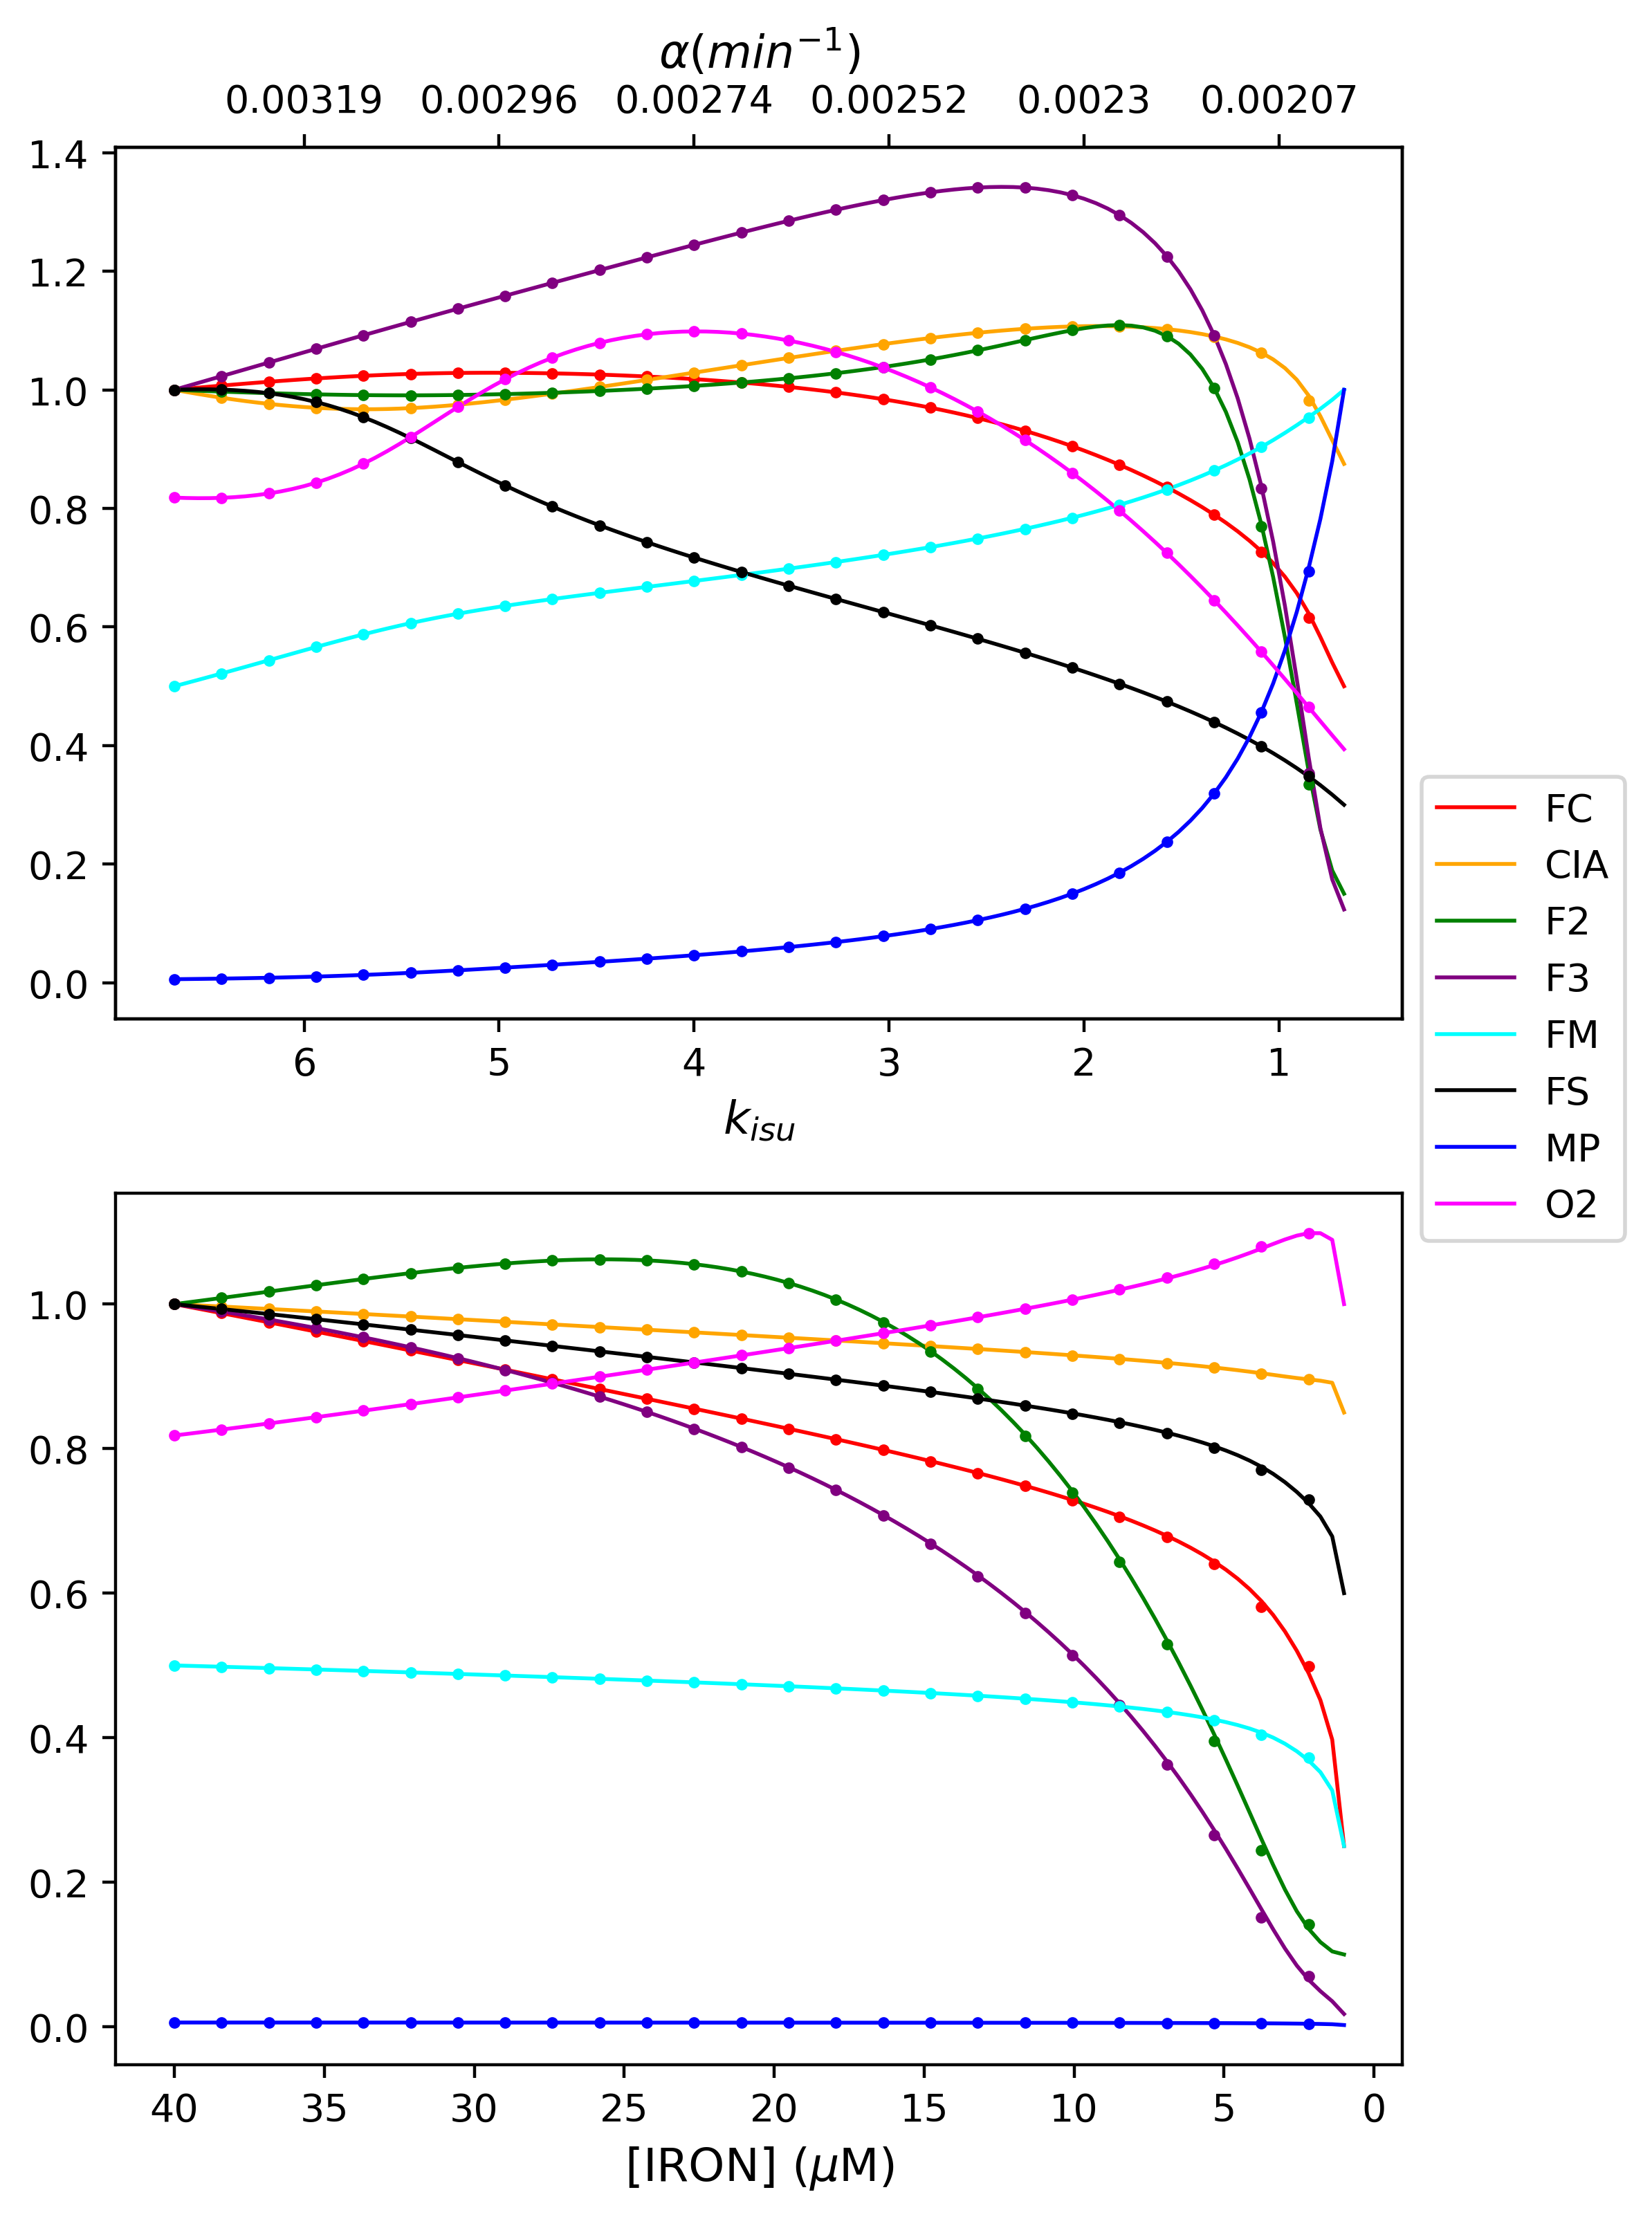

In [8]:
fig, axs = plt.subplots(2)
fig.set_size_inches(6,9)
linestyle = {1: '-', 3: 'o'}
cases = [case1,case3]

# create secondary x-axis
def kisu_to_alpha(kisu):
    V = 0.000222188885555 * kisu + 0.00185188888889;
    return np.round(V,5)

# plot W to Y data
for case in cases:
    ydata = case.getStateTransitionData('Y')
    x_data = ydata[case.ystate.independent]
    for component in ydata:
        if component == case.ystate.independent:
            continue
        else:
            y_data = ydata[component]
            ls = linestyle[case.id]
            if ls != 'o':
                axs[0].plot(x_data,y_data, color=constants.COLOR_MAP[component],ls=ls, label=component, linewidth=1)
            else:
                axs[0].plot(x_data,y_data, color=constants.COLOR_MAP[component],ls='None',marker='o', label='_no_legend_', markersize=2, markevery=4)

# plot W to D values
for case in cases:
    ydata = case.getStateTransitionData('D')
    x_data = ydata[case.dstate.independent]
    for component in ydata:
        if component == case.dstate.independent:
            continue
        else:
            y_data = ydata[component]
            ls = linestyle[case.id]
            if ls != 'o':
                axs[1].plot(x_data,y_data, color=constants.COLOR_MAP[component],ls=ls, label=component, linewidth=1)
            else:
                axs[1].plot(x_data,y_data, color=constants.COLOR_MAP[component],ls='None',marker='o', label="_no_legend_", markersize=2, markevery=4)
axs[0].invert_xaxis()
axs[1].invert_xaxis()

# create axis labels and legend
axs[1].set_xlabel('''[IRON] ($\mu$M)''', fontsize=12)
axs[1].legend(bbox_to_anchor=(1.0, 1.5))
axs[0].set_xlabel('''$k_{isu}$''', fontsize=12)

kisuaxs = axs[0].twiny()
kisuaxs.set_xlim(axs[0].get_xlim())
kisuaxs.xaxis.set_major_locator(mticker.FixedLocator(axs[0].get_xticks()))
kisuaxs.set_xticklabels(kisu_to_alpha(axs[0].get_xticks()))
kisuaxs.set_xlabel("$\\alpha (min^{-1})$",fontsize=12)
